# Fort Collins Bridge Dashboard - update ArcGIS Online

In [1]:
# Resources
# ESRI overwriting feature layers in AGOL:
# https://developers.arcgis.com/python/sample-notebooks/overwriting-feature-layers/

# Downloading the arcgis module
# https://developers.arcgis.com/python/guide/install-and-set-up/

In [2]:
# Running notebook from terminal
# https://nbconvert.readthedocs.io/en/latest/execute_api.html

# To run from command line: open command prompt, navigate to the home directory, run this command:
# jupyter nbconvert --to notebook --execute Update_AGOL.ipynb

In [3]:
#### Import the ArcGIS Python API ####

from arcgis.gis import *
# from arcgis import features
from arcgis.features import *
from IPython.display import display

#### Import packages ####

import pandas as pd
import numpy as np
import os
import time
import glob

# Get most recent bridge data csv

In [4]:
# Get current directory (assuming csv's are stored in the same file as the notebook)
# https://github.com/ipython/ipython/issues/10123

workbookDir = os.getcwd()
workbookDir

'C:\\Users\\Daniel.Aragon\\Desktop\\FortCollinsDemo'

In [5]:
# Get most recently created csv using glob.  Change to 'getmtime' if newest modification date is needed
# https://stackoverflow.com/questions/18279063/python-find-newest-file-with-mp3-extension-in-directory

newestcsv = max(glob.iglob('*.csv'), key=os.path.getctime)
print ('newest .csv file: ',newestcsv)

newest .csv file:  bridge_data_20180819214219.csv


# Read newestcsv into pandas dataframe

In [6]:
# read the initial csv
# csv1 = 'temp_bridge_data.csv'
csv1 = newestcsv
FC_bridgeData = pd.read_csv(csv1)
FC_bridgeData.head()

Unnamed: 0        bridge_id            brkey       struct_num  yearbuilt  \
0           0  FCLMY-0.2-TRILB  FCLMY-0.2-TRILB  FCLMY-0.2-TRILB       1986   
1           1   FCLMY-1.2-VINE   FCLMY-1.2-VINE   FCLMY-1.2-VINE       1958   
2           2  FCLNDS-0.1-BDWK  FCLNDS-0.1-BDWK  FCLNDS-0.1-BDWK       1982   
3           3   FCMNR-0.0-CLGE   FCMNR-0.0-CLGE   FCMNR-0.0-CLGE       1974   
4           4  FCMOSS-0.1-BENT  FCMOSS-0.1-BENT  FCMOSS-0.1-BENT       1985   

    latitude   longitude scourcrit  suff_rate nbi_rating        in_modtime  \
0  40.497778 -105.058056         8       95.6          0   1/11/2016 11:46   
1  40.613333 -105.057500         8       68.2          0  10/23/2015 15:17   
2  40.533611 -105.072222         8       97.8          0   9/19/2015 12:47   
3  40.540000 -105.076389         8       19.8          1  10/15/2015 12:41   
4  40.530833 -105.089167         5       97.4          0   11/16/2015 9:48   

   Inspection_number  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

# Connect to Denver_Field_User agol account

In [7]:
#Access the AGOL account 
gis = GIS("https://www.arcgis.com", "Denver_Field_User", "165SouthUnion")

<User username:Denver_Field_User>
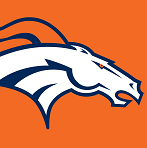

In [8]:
# Get user data
user = gis.users.get('Denver_Field_User')
user

# Check for existing feature layer, create boolean variable to store result

In [9]:
# check if service name is available (True means feature layer does not exist, False means service layer already exists)
search_result1 = gis.content.search(query='Latest Fort Collins Bridge Inspection Data csv', item_type="csv")

print ('length of search result: ',len(search_result1))

if len(search_result1) == 0:
    layer_available = True
else:
    layer_available = False


layer_available

length of search result:  1


False

# Upload the csv into a new feature layer OR overwrite existing to AGOL

In [10]:
if layer_available == True:
  
    # add the csv as an item 
    item_prop = {'title':'Latest Fort Collins Bridge Inspection Data csv'}
    csv_item = gis.content.add(item_properties=item_prop, data=csv1)
    csv_item
    
    # publish the csv item into a feature layer 
    bridge_item = csv_item.publish()
    bridge_item.protect(enable = False)
    bridge_item
    
    # update the item metadata
    item_prop = {'title':'Latest Fort Collins Bridge Inspections'}
    bridge_item.update(item_properties = item_prop)
    
    # Display the web location of the feature layer
    bridge_item.url
    
    print('Bridge Inspection Data added to AGOL account')
    
else: 
    # Find bridges feature layer, return as item
    search_my_contents = gis.content.search(query="title: Latest Fort Collins Bridge Inspections", item_type="Feature Service")
    search_my_contents
    search_result_id = (search_my_contents[0]).id
    search_result_id
    bridge_item = gis.content.get(search_result_id)
    
    # Convert bridges item into feature layer 
    bridge_flayer_collection = FeatureLayerCollection.fromitem(bridge_item)
    
    # use the overwrite() method to update the bridge item which can be accessed using the manager property
    bridge_flayer_collection.manager.overwrite(newestcsv)
    
    print('Bridge Inspection Data updated with new data to AGOL account')

Bridge Inspection Data updated with new data to AGOL account
